[Table of Contents](contents.ipynb) | Previous: [Introduction](signal_processing_01.ipynb) | Next: [Profile Plots](signal_processing_03.ipynb)

# Signal processing for bio-image analysts.

## Reducing Dimensionality

Images are signals with at least 2 spatial dimensions. Signals with a high number of dimensions are more difficult to explore and understand. Therefore we will sometimes reduce the number of dimensions, by only looking at a part of the whole input image. 3D images can be reduced to 2 dimensions by using projections. We can obtain a 1 dimensional signal from a 3D or 2D image by using a profile plot.

### Projection of a 3D image

To do a z-projection of an image we will apply a function on all the z-values for each x,y-position of the image. In a similar way we can do an x-projection or a y-proyection. Funtions often used are the maximum, the minimum, the average, the median and the standard deviation. 

First we load the example image and attach its dimensions and its pixel array to the beakerx object, since we want to make a 3D-rendering with ipyvolume from python.

In [2]:
%%groovy
import net.imglib2.img.display.imagej.ImageJFunctions
import net.imglib2.img.display.imagej.ImageJVirtualStack
microtubules = ij2.io().open("../data/microtubules/ground-truth.tif")
ip = ImageJFunctions.wrapFloat(microtubules, "microtubules-gt")
beakerx.width = ip.getWidth()
beakerx.height = ip.getHeight()
beakerx.slices = ip.getImageStack().getSize()
pixels = new float[beakerx.width*beakerx.height*beakerx.slices]
pixels = ip.getImageStack().duplicate().getVoxels(0,0,0,beakerx.width,beakerx.height,beakerx.slices,pixels);
beakerx.pixels = pixels
println(beakerx.width+", "+beakerx.height+", "+beakerx.slices)
OutputCell.HIDDEN

512, 256, 128


In order to make the 3D-rendereing we get the pixel-data and the dimensions from the beaker object. We reshape the image array and divide all pixel values by the maximum, so that we end up with values between zero and one. Note that the data is displayed with a color-map. The original image contains only brightness values in the form of floating point numbers.

In [3]:
import ipyvolume
import numpy as np
from beakerx.object import beakerx
imArray = np.array(beakerx.pixels, dtype='float')
imArray = np.reshape(imArray, (beakerx.slices, beakerx.height, beakerx.width)) 
imArray = imArray / float(np.amax(imArray))
ipyvolume.style.axes_off()
ipyvolume.style.box_off()
ipyvolume.volshow(imArray)
ipyvolume.show()

/home/baecker/anaconda3/envs/beaker/lib/python3.6/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/home/baecker/anaconda3/envs/beaker/lib/python3.6/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/home/baecker/anaconda3/envs/beaker/lib/python3.6/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 +

Now we create the x, y and z-projections using the maximum-function. Other available functions are:

1. IterableGeometricMean
1. IterableHarmonicMean
1. IterableMax
1. IterableMean
1. IterableMin
1. IterableStandardDeviation
1. IterableVariance

x-projection of microtubules-gt


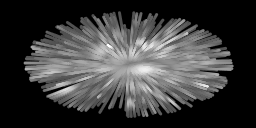

y-projection of microtubules-gt


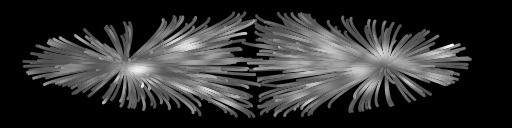

z-projection of microtubules-gt


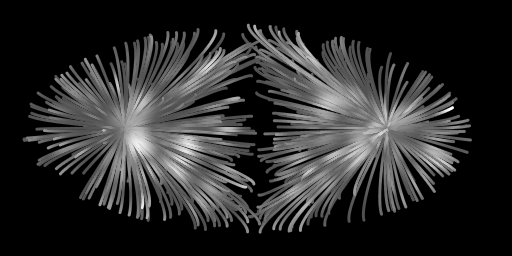

null

In [4]:
%%groovy
import net.imglib2.img.display.imagej.ImageJFunctions
import net.imagej.axis.Axes

projectionOp = net.imagej.ops.stats.IterableMax
proj_op = ij2.op().op(projectionOp, microtubules)

title = "projection of microtubules-gt"
(axes, names) = [[Axes.X, Axes.Y, Axes.Z],["x", "y", "z"]]
(dims, projectedImages, outputs, ips) = [[microtubules.dimensionIndex(Axes.X), microtubules.dimensionIndex(Axes.Y), microtubules.dimensionIndex(Axes.Z)],[],[],[]]
i = 0;
for(axe in axes) {
    (otherDimIndex1, otherDimIndex2) = [(int)Math.floor((2 - i) / 2), (int)Math.floor((5 - i) / 2)]
    projectedImages.add(ij2.op().create().img(microtubules.dimension(dims[otherDimIndex1]), microtubules.dimension(dims[otherDimIndex2])))
    projectedImages[i] = ij2.op().transform().project(projectedImages[i], microtubules, proj_op, dims[i])
    outputs.add(ij2.dataset().create(projectedImages[i]))
    ips.add(ImageJFunctions.wrap(outputs[i], names[i] + "-" + title))
    ips[i].getProcessor().setMinAndMax(ips[i].getProcessor().getStatistics().min, ips[i].getProcessor().getStatistics().max)
    println(names[i] + "-" + title)
    display(Image(ips[i].getBufferedImage()))
    i++;
}

[Table of Contents](contents.ipynb) | Previous: [Introduction](signal_processing_01.ipynb) | Next: [Profile Plots](signal_processing_03.ipynb)

In [3]:
%%groovy
%classpath add jar ../Fiji.app/jars/*
%classpath add jar ../Fiji.app/jars/bio-formats/*
currentPath = System.getProperty("java.library.path")
newPath = currentPath + ":../Fiji.app/lib/linux64"
System.setProperty( "java.library.path", newPath )
import net.imagej.ImageJ
ij2 = new ImageJ()

net.imagej.ImageJ@ecf5241